In [32]:
import numpy as np

import pandas as pd                #Importing libraries

from matplotlib import pyplot
%matplotlib inline
%matplotlib notebook

In [33]:
#Loading data into pandas dataframe
df = pd.read_csv( r'dataset_housingprices.csv')
df.columns

print(df.head)   #Analysis the data present
print(df.tail)

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  ho

In [34]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [35]:
df=df.dropna(subset=["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"]) #remove total_bedrooms
#TODO:replace missing data with median

X = df.iloc[:, [0,1,7]]
y = df.iloc[:, 8]
m = y.size


print(X)
print(y)

       longitude  latitude  median_income
0        -122.23     37.88         8.3252
1        -122.22     37.86         8.3014
2        -122.24     37.85         7.2574
3        -122.25     37.85         5.6431
4        -122.25     37.85         3.8462
...          ...       ...            ...
20635    -121.09     39.48         1.5603
20636    -121.21     39.49         2.5568
20637    -121.22     39.43         1.7000
20638    -121.32     39.43         1.8672
20639    -121.24     39.37         2.3886

[20433 rows x 3 columns]
0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20433, dtype: int64


In [36]:
#Method to reduce all values into a smaller range for reduced calculation.
def  Normalize(X):
   
    X_norm = X.copy()                  
                                       #Didn't nomalize and during gradient descent the features were NaN 
    me = np.zeros(X.shape[1])
    st = np.zeros(X.shape[1])          
    
    me = np.mean(X, axis = 0)
    st = np.std(X, axis = 0)
    X_norm = (X - me) / st
    
    return X_norm, me, st

#print(sigma)

In [37]:
X_norm, me, st = Normalize(X)

print('Computed mean:', me)
print('Computed standard deviation:', st)

Computed mean: longitude       -119.570689
latitude          35.633221
median_income      3.871162
dtype: float64
Computed standard deviation: longitude        2.003529
latitude         2.136295
median_income    1.899245
dtype: float64


In [38]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)  #Adding the constant c in (y=mx+c). Value taken as 1 
print(X)

[[ 1.         -1.32731375  1.05171726  2.34516291]
 [ 1.         -1.32232256  1.04235526  2.33263161]
 [ 1.         -1.33230494  1.03767426  1.78293943]
 ...
 [ 1.         -0.82320322  1.77727236 -1.14317103]
 [ 1.         -0.87311515  1.77727236 -1.05513604]
 [ 1.         -0.83318561  1.74918635 -0.78060586]]


In [43]:
def computeCost(X, y, theta):    #Cost function
    
    m = y.shape[0]   #Number of training examples
    
    
    J = 0
    
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))   #Mean squared error cost function. Its similar to distance between two points
    #print(J)                                                   #Goal is to minimize the distance between point and line
    
   
    return J


In [51]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    
    
    m = y.shape[0]   # Number of training examples
    J_history=[]     #List to store the cost functions through the iterations and make a plot to show gradient descent at work
    
    for i in range(num_iters):
        
        

        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        
        J_history.append(computeCost(X, y, theta))  
        
        
        if(i%1000==0):
          print(theta)
           
    
    return theta,J_history

In [52]:
alpha = 0.01   #Learning rate
num_iters = 40000  #Number of iterations taken

# Initialize theta(parameters) with 0s and run gradient descent
theta = np.zeros(X.shape[1])
print("Parameters updating:")
theta,J_history= gradientDescent(X, y, theta, alpha, num_iters)



Parameters updating:
[2068.64413155  -52.40445495 -166.95999871  794.58829048]
[206855.57186631 -51686.66731376 -55148.74462943  74608.10431237]
[206864.41277339 -75980.41392321 -79528.48427376  72116.46848652]
[206864.41315504 -87980.40933869 -91571.07012764  70884.06952   ]
[206864.41315505 -93907.92543959 -97519.62420047  70275.31382521]
[ 206864.41315505  -96835.8804883  -100457.97116295   69974.61294483]
[ 206864.41315505  -98282.17276678 -101909.39662974   69826.07877877]
[ 206864.41315504  -98996.58310436 -102626.34255633   69752.70886226]
[ 206864.41315504  -99349.47313776 -102980.48506892   69716.46706826]
[ 206864.41315504  -99523.78665076 -103155.41725638   69698.56507662]
[ 206864.41315504  -99609.89052998 -103241.82673595   69689.72221125]
[ 206864.41315504  -99652.42239048 -103284.50955075   69685.35419068]
[ 206864.41315504  -99673.43142252 -103305.59314816   69683.19656383]
[ 206864.41315504  -99683.80904113 -103316.00759907   69682.13078276]
[ 206864.41315504  -99688.9

In [53]:
print(X.shape[1])

4


In [54]:
value = np.dot([1,-122.23,37.88,8.3252], theta)   #Subsituting values in the fitted y=m1X1+m2X2......+C
print(value) #Very wrong result F

9058568.132243354


In [56]:
print(len(J_history))

40000


<IPython.core.display.Javascript object>


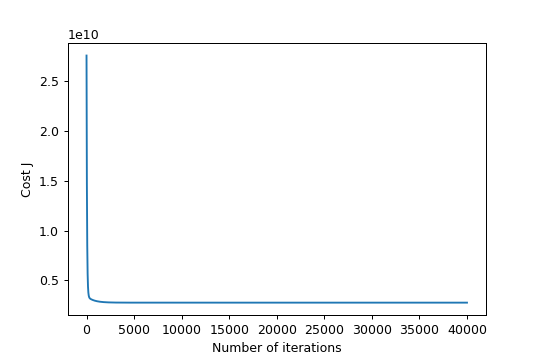

Text(0, 0.5, 'Cost J')

In [57]:
#Plot to see how the cost function decreased as the model is fitted to the data
pyplot.plot(np.arange(len(J_history)), J_history)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')
